In [246]:
import numpy as np
import pandas as pd

In [247]:
from functions import *



df = pd.read_csv("October.csv")
df.head()

,Unnamed: 0,time,open,high,low,close,tick_volume,spread,real_volume
0,0,2024-10-01 00:00:00,1.11346,1.11346,1.11236,1.11298,27,5,0
1,1,2024-10-01 00:05:00,1.11298,1.11336,1.11292,1.11336,49,13,0
2,2,2024-10-01 00:10:00,1.11336,1.11336,1.11324,1.11331,50,15,0
3,3,2024-10-01 00:15:00,1.11331,1.11334,1.11317,1.11327,162,17,0
4,4,2024-10-01 00:20:00,1.11328,1.11343,1.11325,1.11332,119,11,0


In [248]:
del df['Unnamed: 0']

In [249]:
rsi(df)

,time,open,high,low,close,tick_volume,spread,real_volume,RSI
0,2024-10-01 00:00:00,1.11346,1.11346,1.11236,1.11298,27,5,0,NaN
1,2024-10-01 00:05:00,1.11298,1.11336,1.11292,1.11336,49,13,0,100.000000
2,2024-10-01 00:10:00,1.11336,1.11336,1.11324,1.11331,50,15,0,88.372093
3,2024-10-01 00:15:00,1.11331,1.11334,1.11317,1.11327,162,17,0,80.851064
4,2024-10-01 00:20:00,1.11328,1.11343,1.11325,1.11332,119,11,0,82.692308
...,...,...,...,...,...,...,...,...,...
6332,2024-10-30 23:40:00,1.08594,1.08605,1.08593,1.08597,82,0,0,37.068966
6333,2024-10-30 23:45:00,1.08597,1.08598,1.08576,1.08576,140,0,0,30.370370
6334,2024-10-30 23:50:00,1.08576,1.08581,1.08563,1.08563,149,0,0,30.827068
6335,2024-10-30 23:55:00,1.08563,1.08569,1.08550,1.08566,197,0,0,31.343284


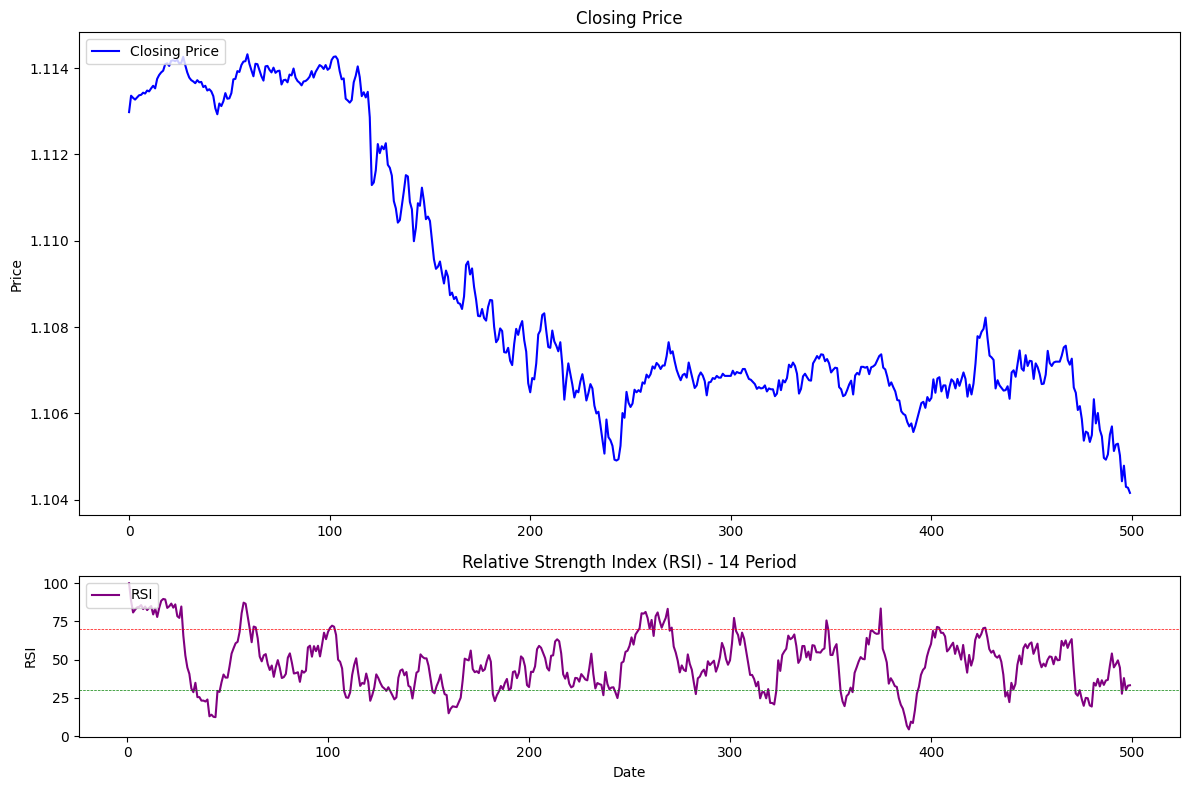

In [250]:
import matplotlib.pyplot as plt

data = df.head(500)
period = 14
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [3, 1]})

# Plot the closing price on the first subplot
ax1.plot(data['close'], color='blue', label='Closing Price')
ax1.set_title('Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='upper left')

# Plot the RSI on the second subplot
ax2.plot(data['RSI'], color='purple', label='RSI')
ax2.axhline(70, color='red', linestyle='--', linewidth=0.5)  # Overbought line
ax2.axhline(30, color='green', linestyle='--', linewidth=0.5)  # Oversold line
ax2.set_title(f'Relative Strength Index (RSI) - {period} Period')
ax2.set_ylabel('RSI')
ax2.set_xlabel('Date')
ax2.legend(loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

In [251]:
def rsi_signal(data, period=14):
    """Calculate the RSI and generate buy/sell signals based on the first crossover with thresholds."""
    # Ensure RSI is calculated
    data = rsi(data, period)
    
    # Initialize the 'Signal' column
    data['Signal'] = 0  # Default: No signal
    
    # Track the previous state of the RSI and signals
    prev_rsi = None
    buy_signal_triggered = False
    sell_signal_triggered = False
    
    for i in range(len(data)):
        current_rsi = data['RSI'].iloc[i]
        
        # Only check if the previous RSI value is available
        if prev_rsi is not None:
            # Check for buy signal (first time crossing below 30)
            if current_rsi < 30 and prev_rsi >= 30 and not buy_signal_triggered:
                data['Signal'].iloc[i] = 1  # Buy signal
                buy_signal_triggered = True  # Mark buy signal as triggered
            
            # Check for sell signal (first time crossing above 70)
            elif current_rsi > 70 and prev_rsi <= 70 and not sell_signal_triggered:
                data['Signal'].iloc[i] = -1  # Sell signal
                sell_signal_triggered = True  # Mark sell signal as triggered
            
            # Reset signals if crossing back into neutral range (30-70)
            if current_rsi >= 30 and current_rsi <= 70:
                buy_signal_triggered = False
                sell_signal_triggered = False

        # Update previous RSI
        prev_rsi = current_rsi
    
    return data

# Usage example:
# data = rsi_signal(data)


In [252]:
gg = rsi_signal(df)

C:\Users\hevar\AppData\Local\Temp\ipykernel_25272\1343885906.py:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'].iloc[i] = 1  # Buy signal
C:\Users\hevar\AppData\Local\Temp\ipykernel_25272\1343885906.py:21: SettingWithCopyWar

In [253]:
gg

,time,open,high,low,close,tick_volume,spread,real_volume,RSI,Signal
0,2024-10-01 00:00:00,1.11346,1.11346,1.11236,1.11298,27,5,0,NaN,0
1,2024-10-01 00:05:00,1.11298,1.11336,1.11292,1.11336,49,13,0,100.000000,0
2,2024-10-01 00:10:00,1.11336,1.11336,1.11324,1.11331,50,15,0,88.372093,0
3,2024-10-01 00:15:00,1.11331,1.11334,1.11317,1.11327,162,17,0,80.851064,0
4,2024-10-01 00:20:00,1.11328,1.11343,1.11325,1.11332,119,11,0,82.692308,0
...,...,...,...,...,...,...,...,...,...,...
6332,2024-10-30 23:40:00,1.08594,1.08605,1.08593,1.08597,82,0,0,37.068966,0
6333,2024-10-30 23:45:00,1.08597,1.08598,1.08576,1.08576,140,0,0,30.370370,0
6334,2024-10-30 23:50:00,1.08576,1.08581,1.08563,1.08563,149,0,0,30.827068,0
6335,2024-10-30 23:55:00,1.08563,1.08569,1.08550,1.08566,197,0,0,31.343284,0


In [254]:
gg['Signal'].value_counts()

Signal
 0    5942
 1     206
-1     189
Name: count, dtype: int64

In [255]:
import matplotlib.pyplot as plt

def plot_rsi_with_signals(data, period=14):
    """Plot RSI with buy/sell signals indicated on the graph."""
    # Calculate RSI and signals
    data = rsi_signal(data, period)
    
    # Create a figure and axis for price and RSI
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [3, 1]})
    
    # Plot the closing price on the first subplot
    ax1.plot(data['close'], color='blue', label='Closing Price')
    ax1.set_title('Closing Price')
    ax1.set_ylabel('Price')
    ax1.legend(loc='upper left')
    
    # Plot the RSI on the second subplot
    ax2.plot(data['RSI'], color='purple', label='RSI')
    ax2.axhline(70, color='red', linestyle='--', linewidth=0.5)  # Overbought line
    ax2.axhline(30, color='green', linestyle='--', linewidth=0.5)  # Oversold line
    
    # Mark buy signals (1) and sell signals (-1) on the RSI plot
    buy_signals = data[data['Signal'] == 1]
    sell_signals = data[data['Signal'] == -1]
    
    ax2.scatter(buy_signals.index, buy_signals['RSI'], color='green', marker='^', s=100, label='Buy Signal', zorder=5)
    ax2.scatter(sell_signals.index, sell_signals['RSI'], color='red', marker='v', s=100, label='Sell Signal', zorder=5)
    
    ax2.set_title(f'Relative Strength Index (RSI) - {period} Period')
    ax2.set_ylabel('RSI')
    ax2.set_xlabel('Date')
    ax2.legend(loc='upper left')
    
    # Show plot
    plt.tight_layout()
    plt.show()

# Usage: plot_rsi_with_signals(data), assuming 'data' is a DataFrame with 'close' and 'Signal' columns


f:\BullsEye - v5\functions.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RSI'] = rsi
C:\Users\hevar\AppData\Local\Temp\ipykernel_25272\1343885906.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'] = 0  # Default: No signal
C:\Users\hevar\AppData\Local\Temp\ipykernel_25272\1343885906.py:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Wri

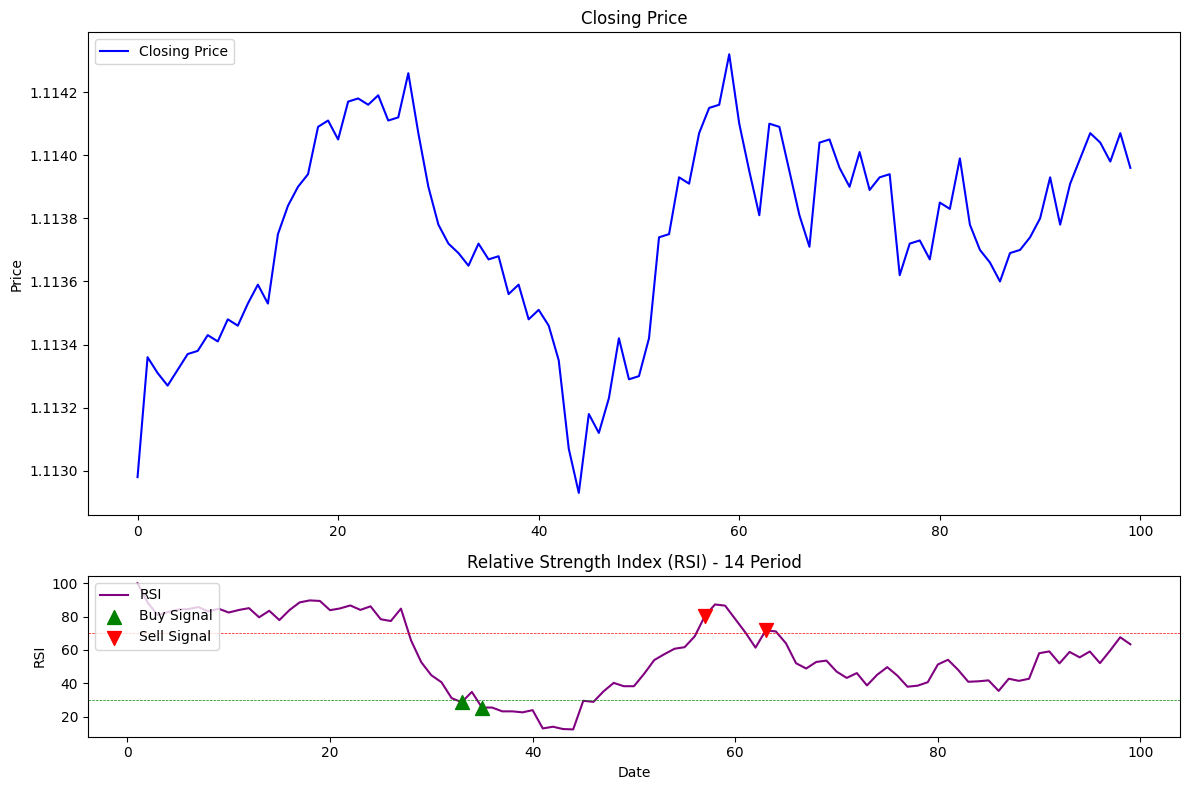

In [256]:
plot_rsi_with_signals(gg.head(100))

In [257]:
gg

,time,open,high,low,close,tick_volume,spread,real_volume,RSI,Signal
0,2024-10-01 00:00:00,1.11346,1.11346,1.11236,1.11298,27,5,0,NaN,0
1,2024-10-01 00:05:00,1.11298,1.11336,1.11292,1.11336,49,13,0,100.000000,0
2,2024-10-01 00:10:00,1.11336,1.11336,1.11324,1.11331,50,15,0,88.372093,0
3,2024-10-01 00:15:00,1.11331,1.11334,1.11317,1.11327,162,17,0,80.851064,0
4,2024-10-01 00:20:00,1.11328,1.11343,1.11325,1.11332,119,11,0,82.692308,0
...,...,...,...,...,...,...,...,...,...,...
6332,2024-10-30 23:40:00,1.08594,1.08605,1.08593,1.08597,82,0,0,37.068966,0
6333,2024-10-30 23:45:00,1.08597,1.08598,1.08576,1.08576,140,0,0,30.370370,0
6334,2024-10-30 23:50:00,1.08576,1.08581,1.08563,1.08563,149,0,0,30.827068,0
6335,2024-10-30 23:55:00,1.08563,1.08569,1.08550,1.08566,197,0,0,31.343284,0


In [258]:
import pandas as pd

def add_next_close_price_on_signal(df):
    """
    Adds a new column to the DataFrame with the close price of the next signal (1 or -1).
    Sets next_close to 0 if the current signal is 0.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame with 'close' and 'Signal' columns.
    
    Returns:
    pd.DataFrame: The DataFrame with the new column 'next_close'.
    """
    # Initialize a new column
    df['next_close'] = None
    
    # Loop through the DataFrame to find the next signal's close price
    for i in range(len(df)):
        if df.at[i, 'Signal'] == 0:
            df.at[i, 'next_close'] = 0  # Set next_close to 0 if Signal is 0
            df.at[i, 'Profit'] = None  # Set next_close to 0 if Signal is 0
        elif df.at[i, 'Signal'] in [1, -1]:  # Check for buy or sell signal
            # Find the next row with either a 1 or -1 signal
            for j in range(i + 1, len(df)):
                if df.at[j, 'Signal'] in [1, -1]:
                    df.at[i, 'next_close'] = df.at[j, 'close']
                    break  # Exit the inner loop once the next signal is found

    return df

In [259]:
def prof_calc(gg):
    dd = add_next_close_price_on_signal(gg)
    dd['Profit'] = dd['close'] - dd['next_close']
    for i in range(len(dd)):
        if dd.at[i, 'Signal'] == 0:
            dd.at[i, 'next_close'] = 0  # Set next_close to 0 if Signal is 0
            dd.at[i, 'Profit'] = 0 
            
    for i in range(len(dd)):
        if dd.at[i,'Signal'] == 1:
            dd.at[i,'Profit'] = dd.at[i, 'Profit'] * -1
            
    dd['Profit Cat'] = None
    for i in range(len(dd)):
        if dd.at[i, 'Signal'] == 0:
            dd.at[i, 'next_close'] = 0  # Set next_close to 0 if Signal is 0
            dd.at[i, 'Profit'] = 0 
    for i in range(len(dd)):
        if dd.at[i,'Profit'] > 0:
            dd.at[i,'Profit Cat'] = 1
        elif dd.at[i,'Profit'] < 0:
            dd.at[i,'Profit Cat'] = -1
        else:
            dd.at[i,'Profit Cat'] = 0

            
    return dd

In [260]:
dd = prof_calc(gg)

In [261]:
dd[dd['Signal']==1]

,time,open,high,low,close,tick_volume,spread,real_volume,RSI,Signal,next_close,Profit,Profit Cat
33,2024-10-01 02:45:00,1.11369,1.11371,1.11365,1.11365,33,0,0,28.703704,1,1.11367,0.00002,1
35,2024-10-01 02:55:00,1.11372,1.11380,1.11357,1.11367,79,0,0,25.490196,1,1.11415,0.00048,1
108,2024-10-01 09:00:00,1.11376,1.11380,1.11323,1.11329,320,0,0,29.411765,1,1.11129,-0.002,-1
121,2024-10-01 10:05:00,1.11285,1.11296,1.11124,1.11129,621,0,0,23.093682,1,1.11176,0.00047,1
129,2024-10-01 10:45:00,1.11227,1.11227,1.11172,1.11176,359,0,0,29.577465,1,1.11151,-0.00025,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6225,2024-10-30 14:45:00,1.08273,1.08273,1.08236,1.08237,205,0,0,27.227723,1,1.0813,-0.00107,-1
6231,2024-10-30 15:15:00,1.08280,1.08283,1.08120,1.08130,692,0,0,22.752809,1,1.08109,-0.00021,-1
6236,2024-10-30 15:40:00,1.08160,1.08171,1.08098,1.08109,413,0,0,27.272727,1,1.08291,0.00182,1
6315,2024-10-30 22:15:00,1.08602,1.08602,1.08563,1.08579,191,0,0,23.076923,1,1.08605,0.00026,1


In [262]:
df = dd

In [263]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pyswarms as ps

# Load your data (assuming it's already in the `df` DataFrame)
# Selecting relevant features and target
features = ['open', 'high', 'low', 'close', 'tick_volume', 'RSI', 'Signal']
target = 'Profit Cat'

# Remove rows with NaN in target
df = df.dropna(subset=[target])

# Define sequence length
sequence_length = 10

# Data Preprocessing - Scaling and Creating Sequences
scaler = MinMaxScaler()
data = scaler.fit_transform(df[features])

X = []
y = []

for i in range(sequence_length, len(data)):
    X.append(data[i-sequence_length:i])  # Sequence of data for each sample
    y.append(df[target].iloc[i])         # Target value for the sequence

X, y = np.array(X), np.array(y)

from sklearn.model_selection import train_test_split

# First, split the data into train+validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Then, split train+validation into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

# Print the shapes to confirm the splits
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Training set: (3795, 10, 7), (3795,)
Validation set: (1266, 10, 7), (1266,)
Test set: (1266, 10, 7), (1266,)


In [264]:
df['RSI']

0              NaN
1       100.000000
2        88.372093
3        80.851064
4        82.692308
           ...    
6332     37.068966
6333     30.370370
6334     30.827068
6335     31.343284
6336     31.578947
Name: RSI, Length: 6337, dtype: float64

In [265]:
import pandas as pd
import numpy as np
import pytorch_lightning as pl
from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer
from pytorch_lightning import Trainer
from pytorch_forecasting.metrics import SMAPE

# Assuming 'df' is your DataFrame
# Step 1: Ensure 'time' is a datetime object
df['time'] = pd.to_datetime(df['time'])

# Step 2: Fill missing values if necessary
df['next_close'].fillna(method='ffill', inplace=True)
df['Profit Cat'].fillna(0, inplace=True)  # Fill NaN Profit Cat with 0 or use another strategy
df['RSI'].fillna(method='bfill', inplace=True)  # Forward fill
# Step 3: Add a time index
df['time_idx'] = (df['time'] - df['time'].min()).dt.total_seconds() // 60
df['time_idx'] = df['time_idx'].astype(int)  # Ensure it's of integer type
df['Signal'] = df['Signal'].astype(str)
# Step 4: Add a group ID for the single time series
df['group_id'] = 0  # Assigning a constant group ID for the entire dataset

# Step 5: Set the maximum encoder and prediction lengths
max_encoder_length = 20  # You can adjust this
max_prediction_length = 1  # Predicting the next time step

# Step 6: Create TimeSeriesDataSet
dataset = TimeSeriesDataSet(
    df,
    time_idx='time_idx',
    target='Profit Cat',  # Target variable
    group_ids=['group_id'],  # Use group_id
    min_encoder_length=max_encoder_length,
    max_encoder_length=max_encoder_length,
    min_prediction_length=max_prediction_length,
    max_prediction_length=max_prediction_length,
    static_categoricals=[],  # Add any static categorical features if available
    time_varying_known_categoricals=['Signal'],  # Include the Signal column
    time_varying_known_reals=['RSI', 'open', 'high', 'low', 'close', 'tick_volume', 'spread', 'real_volume'],
    time_varying_unknown_reals=['next_close'],  # Future features
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True,
    allow_missing_timesteps=True
)

# Step 7: Split into training and validation datasets
train_size = int(len(df) * 0.8)
train_dataset = TimeSeriesDataSet(
    df[:train_size],
    time_idx='time_idx',
    target='Profit Cat',
    group_ids=['group_id'],
    min_encoder_length=max_encoder_length,
    max_encoder_length=max_encoder_length,
    min_prediction_length=max_prediction_length,
    max_prediction_length=max_prediction_length,
    static_categoricals=[],
    time_varying_known_categoricals=['Signal'],  # Include the Signal column
    time_varying_known_reals=['RSI', 'open', 'high', 'low', 'close', 'tick_volume', 'spread', 'real_volume'],
    time_varying_unknown_reals=['next_close'],
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True,
    allow_missing_timesteps=True
)

val_dataset = TimeSeriesDataSet(
    df[train_size:],
    time_idx='time_idx',
    target='Profit Cat',
    group_ids=['group_id'],
    min_encoder_length=max_encoder_length,
    max_encoder_length=max_encoder_length,
    min_prediction_length=max_prediction_length,
    max_prediction_length=max_prediction_length,
    static_categoricals=[],
    time_varying_known_categoricals=['Signal'],  # Include the Signal column
    time_varying_known_reals=['RSI', 'open', 'high', 'low', 'close', 'tick_volume', 'spread', 'real_volume'],
    time_varying_unknown_reals=['next_close'],
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True,
    allow_missing_timesteps=True
)

# Step 8: Create DataLoaders
train_dataloader = train_dataset.to_dataloader(train=True, batch_size=32)
val_dataloader = val_dataset.to_dataloader(train=False, batch_size=32)



C:\Users\hevar\AppData\Local\Temp\ipykernel_25272\3531048146.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['next_close'].fillna(method='ffill', inplace=True)
C:\Users\hevar\AppData\Local\Temp\ipykernel_25272\3531048146.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['next_close'].fillna(method='ffill', inplace=True)
C:\Users\hevar\AppData\Local\Temp\ipykernel_25272\3531048146.py:13: FutureWarning: Downcasting object dtype

In [266]:
# Define the model without using 'input_size' or other dataset-specific parameters
model = TemporalFusionTransformer(
    hidden_size=16,
    attention_head_size=1,
    lstm_layers=1,
    dropout=0.1,
    output_size=3,  # Number of classes for your Profit Cat
)

# Set up the Trainer
# Set up the Trainer
trainer = Trainer(
    max_epochs=20,
    devices=1 if torch.cuda.is_available() else 1,  # Use 1 device for both GPU and CPU
    accelerator="gpu" if torch.cuda.is_available() else "cpu",  # Specify the type of accelerator
)


# Fit the model
trainer.fit(model, train_dataloader, val_dataloader)

# Evaluate the model
predictions = trainer.predict(model, val_dataloader)

# Ensure predictions are converted correctly to a numpy array
predictions = np.array([torch.argmax(pred, dim=-1).cpu().numpy() for pred in predictions]).flatten()

# Retrieve the targets for SMAPE calculation
val_targets = np.concatenate([val_dataset[i][1].numpy() for i in range(len(val_dataset))])
smape = SMAPE()
metric = smape(predictions, val_targets)
print(f'SMAPE: {metric:.2f}')


c:\Users\hevar\AppData\Local\Programs\Python\Python310\lib\site-packages\lightning\pytorch\utilities\parsing.py:208: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
c:\Users\hevar\AppData\Local\Programs\Python\Python310\lib\site-packages\lightning\pytorch\utilities\parsing.py:208: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
c:\Users\hevar\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_forecasting\models\temporal_fusion_transformer\__init__.py:143: UserWarning: In pytorch-forecasting models, on versions 1.1.X, the default optimizer defaults to 'adam', if pytorch_optimizer is not installed, otherwise it defaults to 'ranger' from pytorch_optimizer. From version 1.2.0, the default optimizer will 

TypeError: `model` must be a `LightningModule` or `torch._dynamo.OptimizedModule`, got `TemporalFusionTransformer`

In [274]:
import pytorch_lightning as pl
import torch
from pytorch_forecasting import TemporalFusionTransformer, MultiLoss, SMAPE

class TFTLightningModule(pl.LightningModule):
    def __init__(self, train_dataset, val_dataset):
        super().__init__()
        self.model = TemporalFusionTransformer.from_dataset(
            train_dataset,
            learning_rate=0.03,
            hidden_size=16,
            attention_head_size=1,
            lstm_layers=1,
            dropout=0.1,
            output_size=3,  # Number of classes for Profit Cat
            loss=MultiLoss([SMAPE()]),  # Add loss metric
        )

    def training_step(self, batch, batch_idx):
        # Unpack the batch (adjust according to the actual structure of your DataLoader output)
        x, y = batch[0], batch[1]  # Assuming batch is a tuple (inputs, targets)
        y = y.squeeze(-1) if y.dim() > 1 else y  # Ensure y is 1D

        # Make predictions
        y_hat = self.model(x)["prediction"]  # Access the prediction

        # Debugging shapes
        print(f"Training step - y shape: {y.shape}, y_hat shape: {y_hat.shape}")

        y_hat = y_hat.view(-1, 3)  # Ensure y_hat is [batch_size, num_classes]
        loss = self.model.loss(y_hat, y)
        self.log("train_loss", loss)
        return loss

    def validation_step(self, batch, batch_idx):
        # Unpack the batch (adjust according to the actual structure of your DataLoader output)
        x, y = batch[0], batch[1]  # Assuming batch is a tuple (inputs, targets)
        y = y.squeeze(-1) if y.dim() > 1 else y  # Ensure y is 1D

        # Make predictions
        y_hat = self.model(x)["prediction"]  # Access the prediction

        # Debugging shapes
        print(f"Validation step - y shape: {y.shape}, y_hat shape: {y_hat.shape}")

        y_hat = y_hat.view(-1, 3)  # Ensure y_hat is [batch_size, num_classes]
        val_loss = self.model.loss(y_hat, y)
        self.log("val_loss", val_loss)
        return val_loss

# Instantiate the model as a LightningModule
tft_model = TFTLightningModule(train_dataset, val_dataset)

# Set up the Trainer
trainer = pl.Trainer(
    max_epochs=20,
    devices=1 if torch.cuda.is_available() else 1,
    accelerator="gpu" if torch.cuda.is_available() else "cpu",
)

# Fit the model
trainer.fit(tft_model, train_dataloader, val_dataloader)


AssertionError: MultiLoss not compatible with single target